# Block 5 Exercise 2: Predicting the fare of taxi rides
Using the NY Taxi data set (see Use Case Block I) and the use case from the lecture...

In [1]:
!pip install folium

In [2]:
import pandas as pd
import numpy as np
import folium


In [3]:
# we load the data we have saved after wrangling and pre-processing in block I
X=pd.read_csv('../../DATA/train_cleaned.csv')
drop_columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key','pickup_datetime','pickup_date','pickup_latitude_round3','pickup_longitude_round3','dropoff_latitude_round3','dropoff_longitude_round3']
X=X.drop(drop_columns,axis=1)
X=pd.get_dummies(X)# one hot coding
#generate labels
y=X['fare_amount']
X=X.drop(['fare_amount'],axis=1)

In [4]:
# a quick look at the data
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,...,0,0,1,0,0,0,0,0,1,0
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,...,1,0,0,0,0,0,1,0,0,0
2,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,...,1,0,0,0,0,0,1,0,0,0
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,...,1,0,0,0,0,0,1,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,...,1,0,0,0,0,0,1,0,0,0


In [5]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

In [46]:
y.shape

(400000,)

In [47]:
X.shape

(400000, 31)

### E 2.1 Split data into train and test data
* use data from 2009-1014 for training and 2015 for evaluation


In [6]:
X['pickup_year'].min()

2009

In [7]:
#Traing data from 2009-2014
X_train = X[X['pickup_year']< 2015]
Y_train = y[X['pickup_year']< 2015]

#Test data -->2015
X_test = X[X['pickup_year']== 2015]
Y_test = y[X['pickup_year']== 2015]


In [8]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(372110, 31) (372110,) (27890, 31) (27890,)


### E 2.2 Train a Random Forest Regression Model
* train model using [RF regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
* optimize the model parameters (#trees, depth, vars per split, ...) and evaluate the [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) on train and test data
* Analyze the model error: are there typical settings where the model fails?

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [10]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [11]:
FRegression = RandomForestRegressor( n_estimators = 15)

In [12]:
FRegression.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=15)

#### Mean squared Error

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
#prediction on train and mean error on train
pred_train = FRegression.predict(X_train)
mean_squared_error(Y_train, pred_train)

3.009306629622516

In [15]:
#prediction on test and mean error on test
pred_xtest = FRegression.predict(X_test)

In [16]:
err=mean_squared_error(Y_test, pred_xtest)

In [17]:
#Evaluating Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred_xtest))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred_xtest))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred_xtest)))

Mean Absolute Error: 2.002616923628541
Mean Squared Error: 22.80925343836501
Root Mean Squared Error: 4.77590341593766


On the test data the mean squared error is quite high!!

In [18]:
#Differenz zwischen Testdaten und Prediction

difference =np.abs (Y_test - pred_xtest )

(array([2.7861e+04, 2.7000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.        ,  44.20753333,  88.41506667, 132.6226    ,
        176.83013333, 221.03766667, 265.2452    , 309.45273333,
        353.66026667, 397.8678    , 442.07533333]),
 <BarContainer object of 10 artists>)

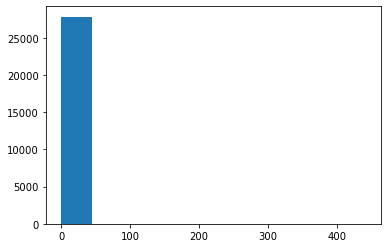

In [19]:
plt.hist(difference)

In [20]:
test = difference[difference < 20]

(array([5.078e+03, 4.821e+03, 4.091e+03, 3.075e+03, 2.376e+03, 1.753e+03,
        1.330e+03, 1.014e+03, 7.650e+02, 5.840e+02, 4.430e+02, 3.640e+02,
        3.110e+02, 2.330e+02, 1.860e+02, 1.780e+02, 1.410e+02, 1.160e+02,
        9.700e+01, 1.190e+02, 6.800e+01, 7.500e+01, 5.300e+01, 4.500e+01,
        5.600e+01, 5.500e+01, 4.100e+01, 3.900e+01, 2.400e+01, 2.700e+01,
        1.800e+01, 1.700e+01, 1.800e+01, 1.200e+01, 1.900e+01, 1.200e+01,
        1.000e+01, 1.400e+01, 1.200e+01, 9.000e+00, 4.000e+00, 6.000e+00,
        1.100e+01, 9.000e+00, 6.000e+00, 4.000e+00, 5.000e+00, 6.000e+00,
        7.000e+00, 8.000e+00]),
 array([ 0.        ,  0.39869333,  0.79738667,  1.19608   ,  1.59477333,
         1.99346667,  2.39216   ,  2.79085333,  3.18954667,  3.58824   ,
         3.98693333,  4.38562667,  4.78432   ,  5.18301333,  5.58170667,
         5.9804    ,  6.37909333,  6.77778667,  7.17648   ,  7.57517333,
         7.97386667,  8.37256   ,  8.77125333,  9.16994667,  9.56864   ,
         9.

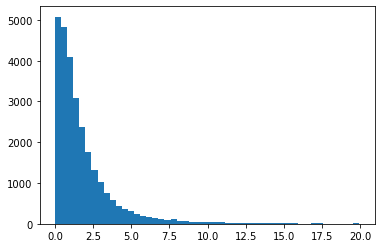

In [21]:
plt.hist(test, bins = 50)

In [26]:
#Korrelation zwischen Fehler und Prediction
corr =np.corrcoef(X_test, difference, rowvar = False)

In [29]:
corr

array([[ 1.        , -0.10284517,  0.30148768, ...,  0.19260331,
         0.00941015,  0.15739471],
       [-0.10284517,  1.        ,  0.05364617, ..., -0.11988744,
        -0.00997073, -0.06721146],
       [ 0.30148768,  0.05364617,  1.        , ...,  0.67584694,
        -0.05968126,  0.11627815],
       ...,
       [ 0.19260331, -0.11988744,  0.67584694, ...,  1.        ,
        -0.00282322,  0.10767337],
       [ 0.00941015, -0.00997073, -0.05968126, ..., -0.00282322,
         1.        ,  0.03200802],
       [ 0.15739471, -0.06721146,  0.11627815, ...,  0.10767337,
         0.03200802,  1.        ]])

#### Tuning the parameters

In [32]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Find the best parameters for the model
parameters = {
    'n_estimators': [20, 50, 100]
}
gridforest = GridSearchCV(FRegression, parameters, cv = 3, n_jobs = -1, verbose = 1)
gridforest.fit(X_train, Y_train)
gridforest.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 20.9min finished


{'n_estimators': 100}

In [33]:
fr = RandomForestRegressor( n_estimators = 100)

In [34]:
fr.fit(X_train,Y_train)

RandomForestRegressor()

In [37]:
#prediction on train and mean error on train
pred_train_neu = fr.predict(X_train)
mean_squared_error(Y_train, pred_train_neu)

2.3551029061753224

In [39]:
#prediction on test and mean error on test
pred_xtest_neu = fr.predict(X_test)

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred_xtest_neu))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred_xtest_neu))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred_xtest_neu)))

Mean Absolute Error: 1.9224446217282187
Mean Squared Error: 21.45874114216171
Root Mean Squared Error: 4.63235805418382


Error score is a little better

#### Defining and visualizing variables importance

In [41]:
# Get features list
characteristics = X.columns

In [42]:
importances = list(fr.feature_importances_)

In [44]:
characteristics_importances = [(characteristic, round(importance, 2)) for characteristic, importance in zip(characteristics, importances)]
characteristics_importances = sorted(characteristics_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in characteristics_importances];

Variable: trip_distance        Importance: 0.75
Variable: dropoff_longitude    Importance: 0.04
Variable: pickup_longitude     Importance: 0.03
Variable: pickup_latitude      Importance: 0.03
Variable: dropoff_latitude     Importance: 0.03
Variable: pickup_year          Importance: 0.03
Variable: pickup_hour          Importance: 0.02
Variable: pickup_day           Importance: 0.01
Variable: pickup_day_of_week   Importance: 0.01
Variable: pickup_month         Importance: 0.01
Variable: dropoff_borough_others Importance: 0.01
Variable: passenger_count      Importance: 0.0
Variable: is_pickup_JFK        Importance: 0.0
Variable: is_dropoff_JFK       Importance: 0.0
Variable: is_pickup_EWR        Importance: 0.0
Variable: is_dropoff_EWR       Importance: 0.0
Variable: is_pickup_la_guardia Importance: 0.0
Variable: is_dropoff_la_guardia Importance: 0.0
Variable: is_pickup_lower_manhattan Importance: 0.0
Variable: is_dropoff_lower_manhattan Importance: 0.0
Variable: pickup_borough_bronx Impo

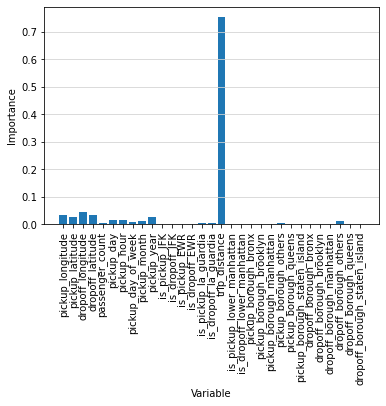

In [45]:
# Visualize the variables importances
plt.bar(characteristics, importances, orientation = 'vertical')
plt.xticks(rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.grid(axis = 'y', color = '#D3D3D3', linestyle = 'solid')
plt.show()